<a href="https://colab.research.google.com/github/priyanka772/HousePricePrediction_Using_ML/blob/main/Copy_of_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

Importing Data

In [ ]:
application_data = pd.read_csv('/content/applicationdata.csv')

In [ ]:
columns_description = pd.read_csv('/content/columns_description (1) 23.csv')

Data Dimensions

In [ ]:
print ("application_data     :",application_data.shape)
print ("columns_description  :",columns_description.shape)

application_data     : (11631, 122)
columns_description  : (160, 5)


First Few rows of Data

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(3))

'application_data'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MOND

Percentage of Missing values in application_data

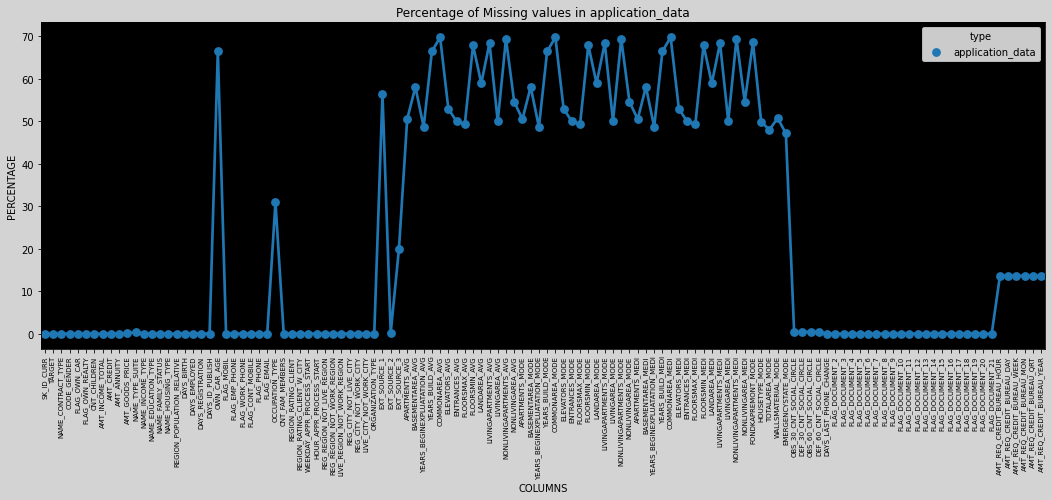

In [ ]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [ ]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00 
TARGET                          0.00 
NAME_CONTRACT_TYPE              0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT                      0.00 
AMT_ANNUITY                     0.00 
AMT_GOODS_PRICE                 0.08 
NAME_TYPE_SUITE                 0.40 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.01 
NAME_HOUSING_TYPE               0.01 
REGION_POPULATION_RELATIVE      0.01 
DAYS_BIRTH                      0.01 
DAYS_EMPLOYED                   0.01 
DAYS_REGISTRATION               0.01 
DAYS_ID_PUBLISH                 0.01 
OWN_CAR_AGE                     66.49
FLAG_MOBIL                      0.01 
FLAG_EMP_PHONE                  0.01 
FLAG_WORK_PHONE                 0.01 
FLAG_CONT_MOBILE                0.01 
FLAG_PHONE  

Removing columns with missing values more than 40%
As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [ ]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

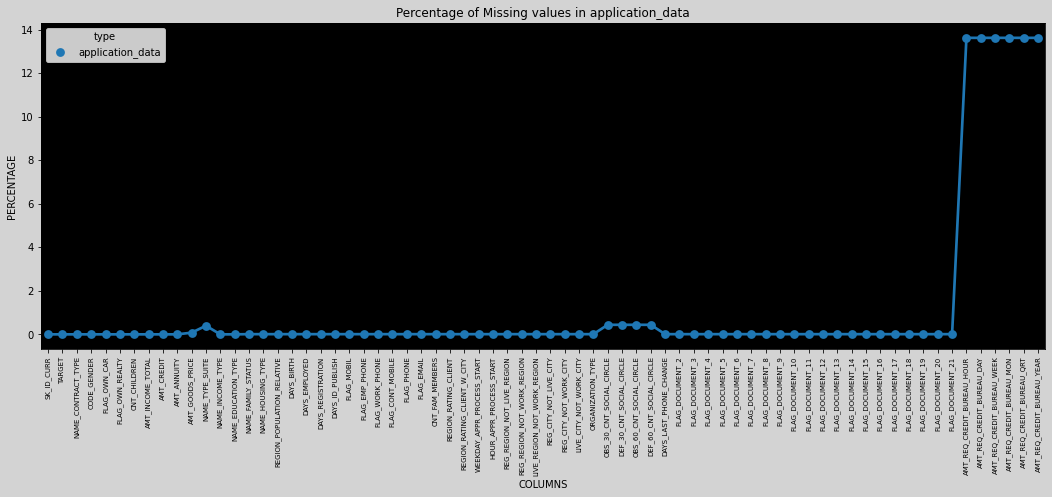

In [ ]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [ ]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.00 
TARGET                         0.00 
NAME_CONTRACT_TYPE             0.00 
CODE_GENDER                    0.00 
FLAG_OWN_CAR                   0.00 
FLAG_OWN_REALTY                0.00 
CNT_CHILDREN                   0.00 
AMT_INCOME_TOTAL               0.00 
AMT_CREDIT                     0.00 
AMT_ANNUITY                    0.00 
AMT_GOODS_PRICE                0.08 
NAME_TYPE_SUITE                0.40 
NAME_INCOME_TYPE               0.00 
NAME_EDUCATION_TYPE            0.00 
NAME_FAMILY_STATUS             0.01 
NAME_HOUSING_TYPE              0.01 
REGION_POPULATION_RELATIVE     0.01 
DAYS_BIRTH                     0.01 
DAYS_EMPLOYED                  0.01 
DAYS_REGISTRATION              0.01 
DAYS_ID_PUBLISH                0.01 
FLAG_MOBIL                     0.01 
FLAG_EMP_PHONE                 0.01 
FLAG_WORK_PHONE                0.01 
FLAG_CONT_MOBILE               0.01 
FLAG_PHONE                     0.01 
FLAG_EMAIL                     0.01 
C

MISSING values Suggestion

In [ ]:
print("AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_DAY NAN COUNT : 1584


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()


count    10047.000000
mean     0.008062    
std      0.115642    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      4.000000    
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

We can Fill NA with 0 i.e. Median for this field

In [ ]:
print("AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT :" ,application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR NAN COUNT : 1584


In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    10047.000000
mean     0.007465    
std      0.089483    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      2.000000    
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [ ]:
print("OBS_60_CNT_SOCIAL_CIRCLE :" ,application_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

OBS_60_CNT_SOCIAL_CIRCLE : 51


In [ ]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()


count    11580.000000
mean     1.408463    
std      2.281471    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      2.000000    
max      25.000000   
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
print("DEF_60_CNT_SOCIAL_CIRCLE :" ,application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum())

DEF_60_CNT_SOCIAL_CIRCLE : 51


In [ ]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()


count    11580.000000
mean     0.103195    
std      0.371690    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      5.000000    
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
application_data.isnull().sum()

SK_ID_CURR                     0   
TARGET                         0   
NAME_CONTRACT_TYPE             0   
CODE_GENDER                    0   
FLAG_OWN_CAR                   0   
FLAG_OWN_REALTY                0   
CNT_CHILDREN                   0   
AMT_INCOME_TOTAL               0   
AMT_CREDIT                     0   
AMT_ANNUITY                    0   
AMT_GOODS_PRICE                9   
NAME_TYPE_SUITE                46  
NAME_INCOME_TYPE               0   
NAME_EDUCATION_TYPE            0   
NAME_FAMILY_STATUS             1   
NAME_HOUSING_TYPE              1   
REGION_POPULATION_RELATIVE     1   
DAYS_BIRTH                     1   
DAYS_EMPLOYED                  1   
DAYS_REGISTRATION              1   
DAYS_ID_PUBLISH                1   
FLAG_MOBIL                     1   
FLAG_EMP_PHONE                 1   
FLAG_WORK_PHONE                1   
FLAG_CONT_MOBILE               1   
FLAG_PHONE                     1   
FLAG_EMAIL                     1   
CNT_FAM_MEMBERS             

In [ ]:
print("AMT_ANNUITY  :" ,application_data['AMT_ANNUITY'].isnull().sum())


AMT_ANNUITY  : 0


In [ ]:
application_data['AMT_ANNUITY'].describe()

count    11631.000000 
mean     27103.465179 
std      14388.019640 
min      2596.500000  
25%      16456.500000 
50%      24997.500000 
75%      34744.500000 
max      135936.000000
Name: AMT_ANNUITY, dtype: float64

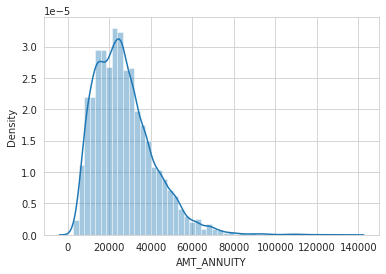

In [ ]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_ANNUITY']) 
plt.show()

In [ ]:
print("AMT_GOODS_PRICE   :" ,application_data['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE   : 9


In [ ]:
application_data['AMT_GOODS_PRICE'].describe()

count    1.162200e+04
mean     5.398775e+05
std      3.704646e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.961000e+06
Name: AMT_GOODS_PRICE, dtype: float64

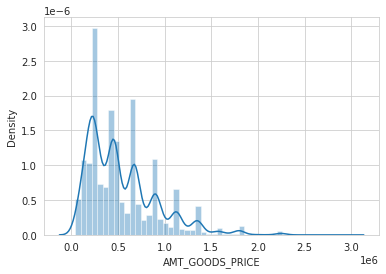

In [ ]:
sns.set_style('whitegrid') 
sns.distplot(application_data['AMT_GOODS_PRICE']) 
plt.show()

In [ ]:
print("NAME_TYPE_SUITE :" ,application_data['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE : 46


In [ ]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      9421
Family             1539
Spouse, partner    408 
Children           127 
Other_B            57  
Other_A            24  
Group of people    9   
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
print("CNT_FAM_MEMBERS :" ,application_data['CNT_FAM_MEMBERS'].isnull().sum())

CNT_FAM_MEMBERS : 1


In [ ]:
application_data['CNT_FAM_MEMBERS'].describe()

count    11630.000000
mean     2.162769    
std      0.906824    
min      1.000000    
25%      2.000000    
50%      2.000000    
75%      3.000000    
max      9.000000    
Name: CNT_FAM_MEMBERS, dtype: float64

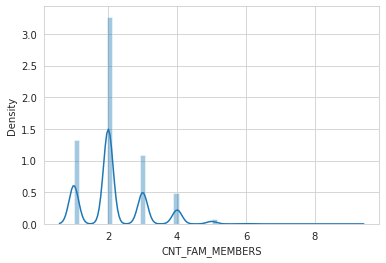

In [ ]:
sns.set_style('whitegrid') 
sns.distplot(application_data['CNT_FAM_MEMBERS']) 
plt.show()

Print the information about the attributes of application_data

In [ ]:
print(type(application_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11631 entries, 0 to 11630
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   11631 non-null  int64  
 1   TARGET                       11631 non-null  int64  
 2   NAME_CONTRACT_TYPE           11631 non-null  object 
 3   CODE_GENDER                  11631 non-null  object 
 4   FLAG_OWN_CAR                 11631 non-null  object 
 5   FLAG_OWN_REALTY              11631 non-null  object 
 6   CNT_CHILDREN                 11631 non-null  int64  
 7   AMT_INCOME_TOTAL             11631 non-null  float64
 8   AMT_CREDIT                   11631 non-null  float64
 9   AMT_ANNUITY                  11631 non-null  float64
 10  AMT_GOODS_PRICE              11622 non-null  float64
 11  NAME_TYPE_SUITE              11585 non-null  object 
 12  NAME_INCOME_TYPE             11631 non-null  object 
 13  NAME_EDUCATION_T

Converting negative values to absolute values

In [ ]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [ ]:
display("application_data")
display(application_data.head())

'application_data'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,-637.0,-3648.0,2120.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,-1188.0,-1186.0,291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,1.0,0.0,1.0,0.0,828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,-225.0,-4260.0,2531.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,-3039.0,-9833.0,2437.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,-3038.0,-4311.0,3458.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Separating numerical and categorical in application_data

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
obj_dtypes = [i for i in application_data.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in application_data.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [ ]:
print(color.BOLD + color.PURPLE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [ ]:
print(color.BOLD + color.PURPLE +"Numerical Columns" + color.END, "\n")
for x in range(len(num_dtypes)): 
    print(num_dtypes[x])

Numerical Columns 

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU

Distribution of Target variable
TARGET :Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)

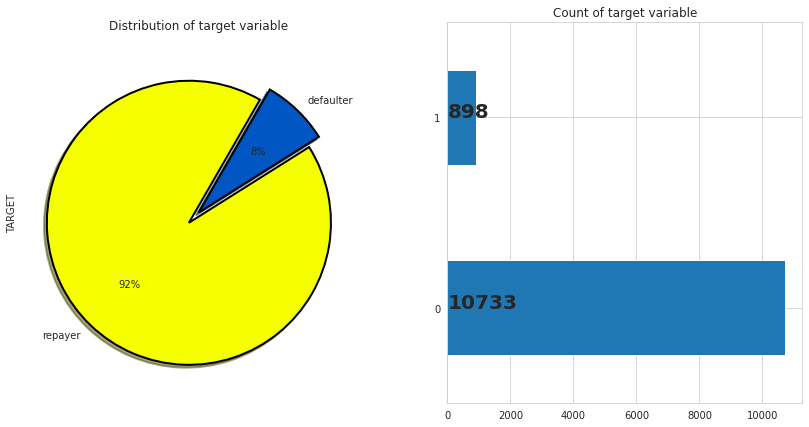

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

Distribution of Number of children and family members of client by repayment status.

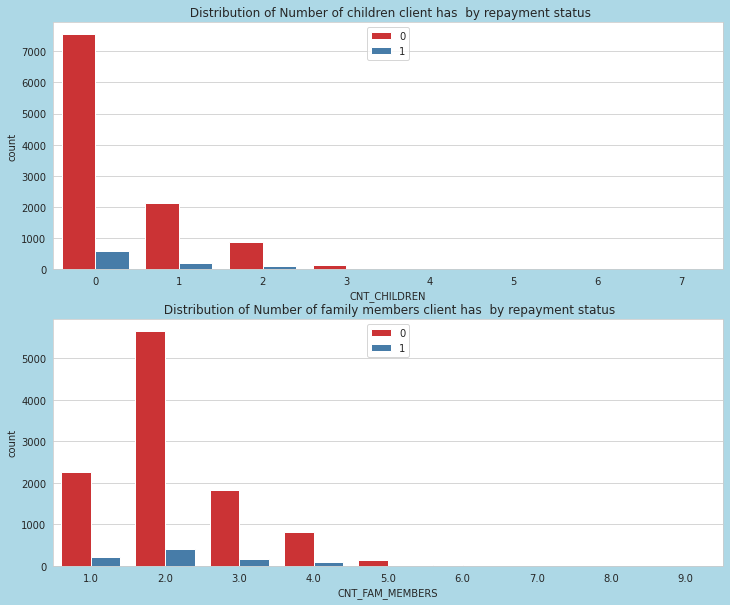

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(application_data["CNT_CHILDREN"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(application_data["CNT_FAM_MEMBERS"],palette="Set1",hue=application_data["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

Comparing summary statistics between defaulters and non - defaulters for loan amounts.

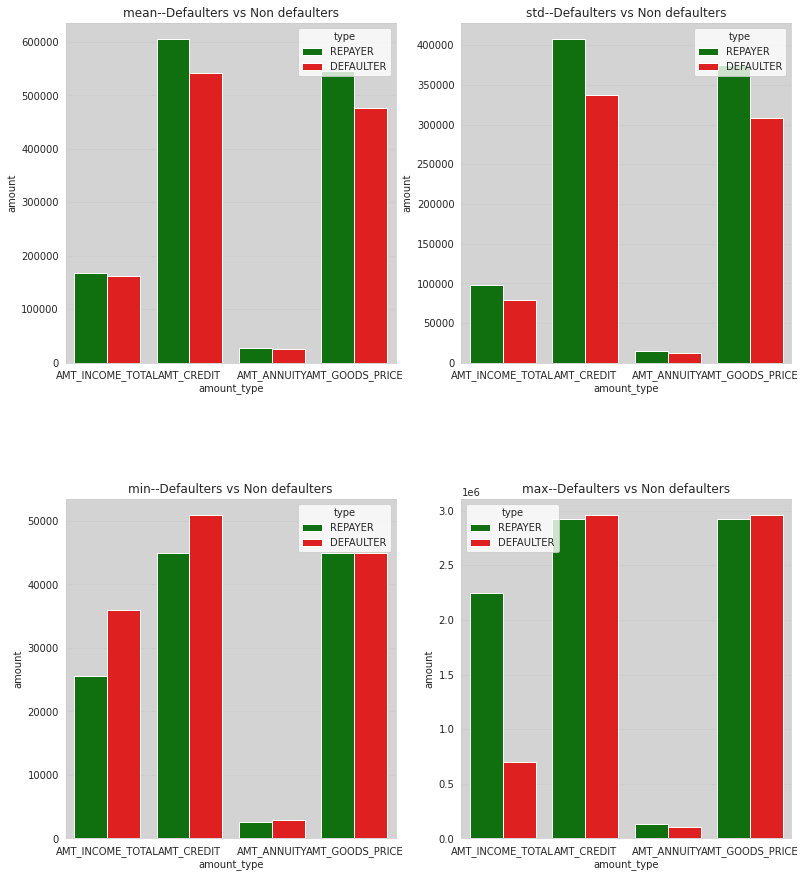

In [ ]:
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")


Scatter plot between credit amount and annuity amount

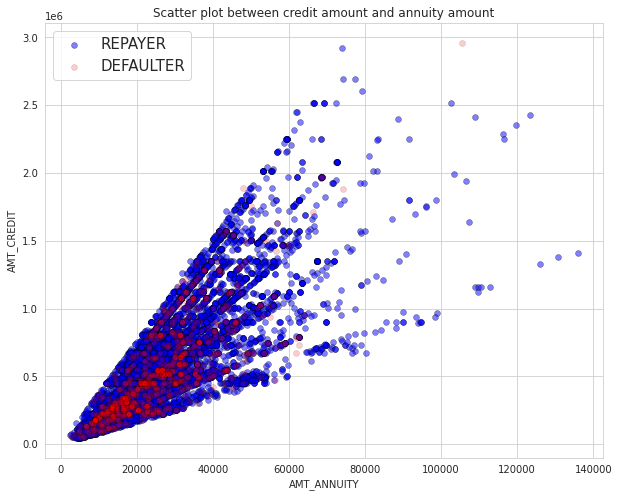

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

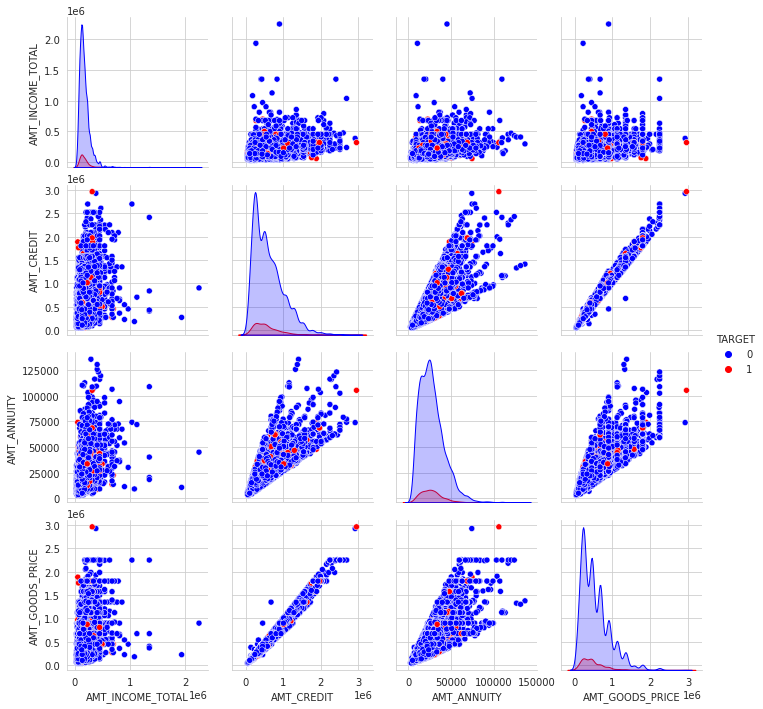

In [ ]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

Distribution of Education type by loan repayment status

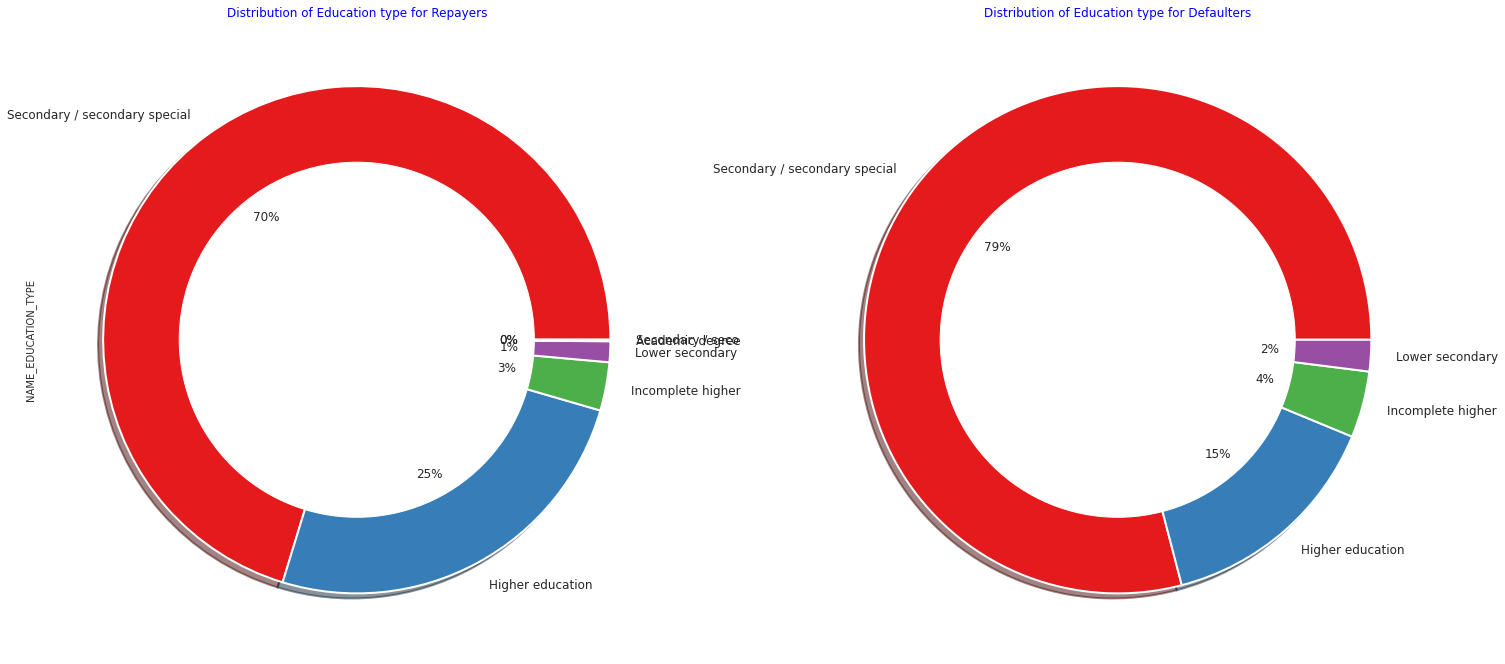

In [ ]:
plt.figure(figsize=(25,25))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()


Distribution normalized population of region where client lives by loan repayment status

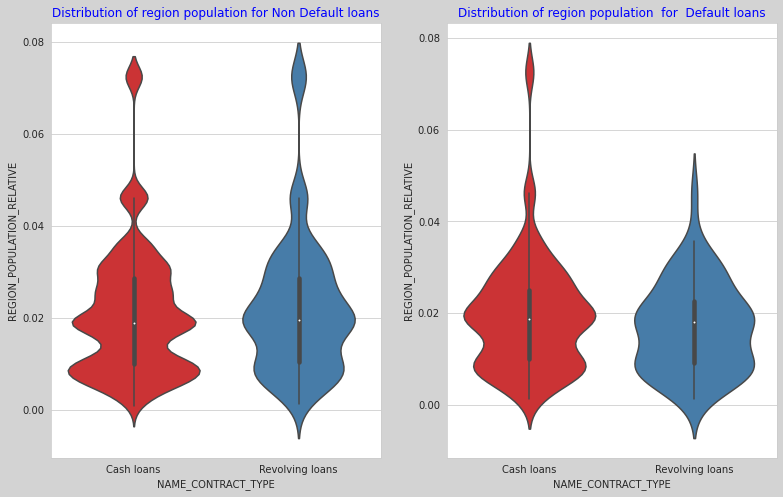

In [ ]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=application_data[application_data["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==0]["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = application_data[application_data["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")


Distribution of days employed for target variable.

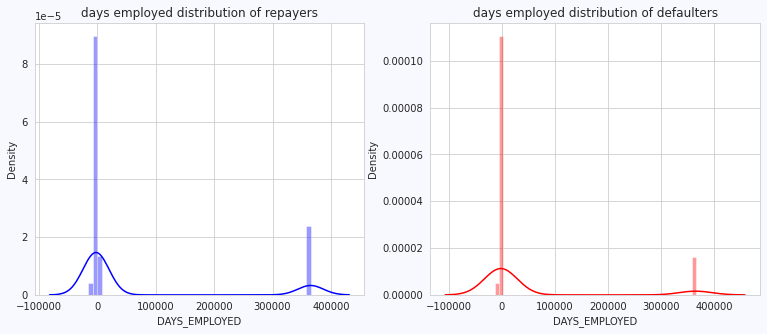

In [ ]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

Distribution of registration days for target variable.

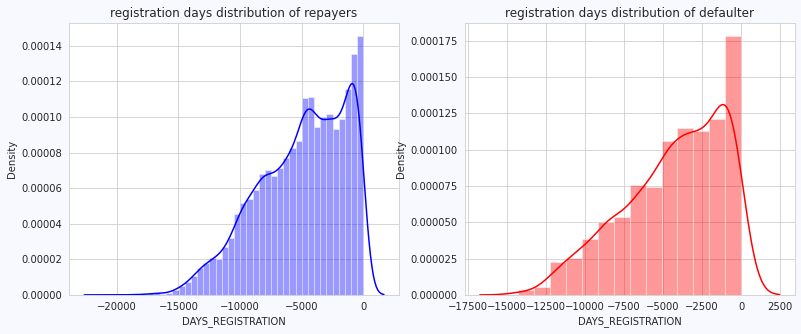

In [ ]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

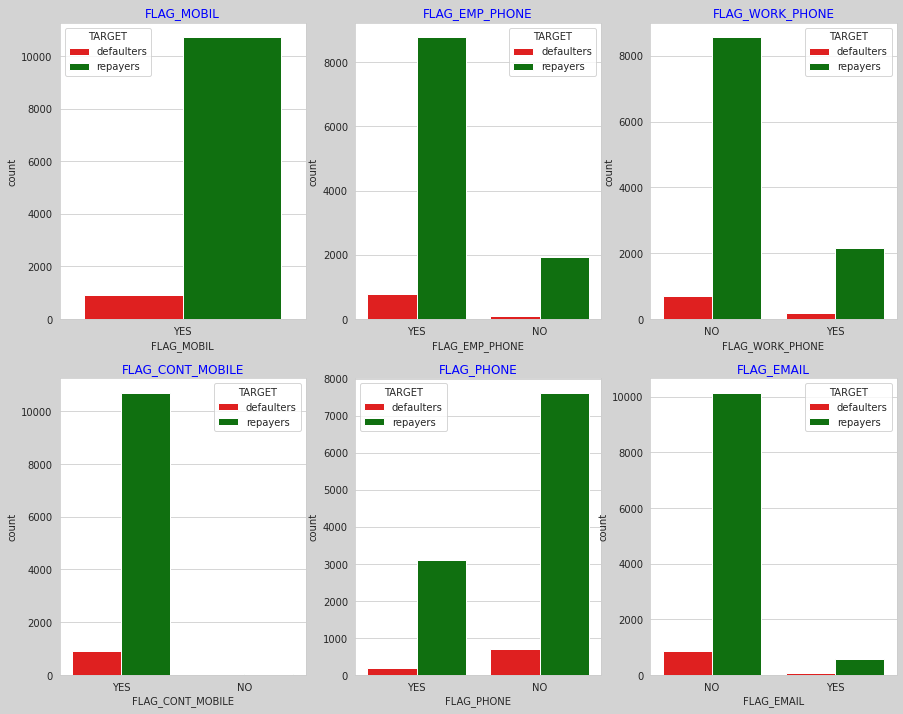

In [ ]:
x   = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")

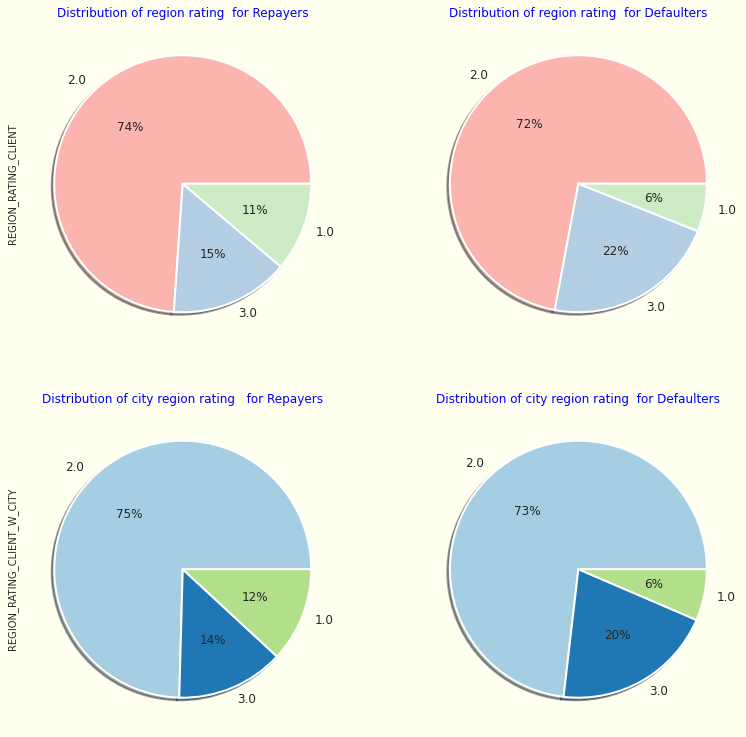

In [ ]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

Peak days and hours for applying loans (defaulters vs repayers)

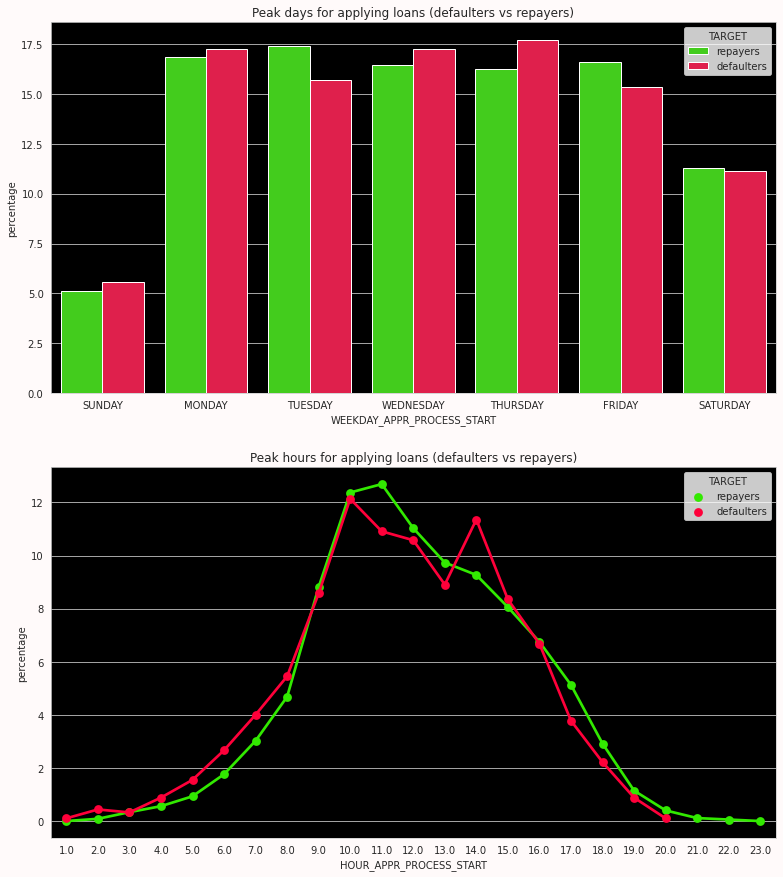

In [ ]:
day = application_data.groupby("TARGET").agg({"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.rename(columns={"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.reset_index()
day_0 = day[:7]
day_1 = day[7:]
day_0["percentage"] = day_0["value_counts"]*100/day_0["value_counts"].sum()
day_1["percentage"] = day_1["value_counts"]*100/day_1["value_counts"].sum()
days = pd.concat([day_0,day_1],axis=0)
days["TARGET"] = days.replace({1:"defaulters",0:"repayers"})

fig = plt.figure(figsize=(13,15))
plt.subplot(211)
order = ['SUNDAY', 'MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY', 'FRIDAY', 'SATURDAY']
ax= sns.barplot("WEEKDAY_APPR_PROCESS_START","percentage",data=days,
                hue="TARGET",order=order,palette="prism")
ax.set_facecolor("k")
ax.set_title("Peak days for applying loans (defaulters vs repayers)")

hr = application_data.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["TARGET"]==0]
hr_1 = hr[hr["TARGET"]==1]
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hrs = pd.concat([hr_0,hr_1],axis=0)
hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

plt.subplot(212)
ax1 = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",
                    data=hrs,hue="TARGET",palette="prism")
ax1.set_facecolor("k")
ax1.set_title("Peak hours for applying loans (defaulters vs repayers)")
fig.set_facecolor("snow")

Heat Map

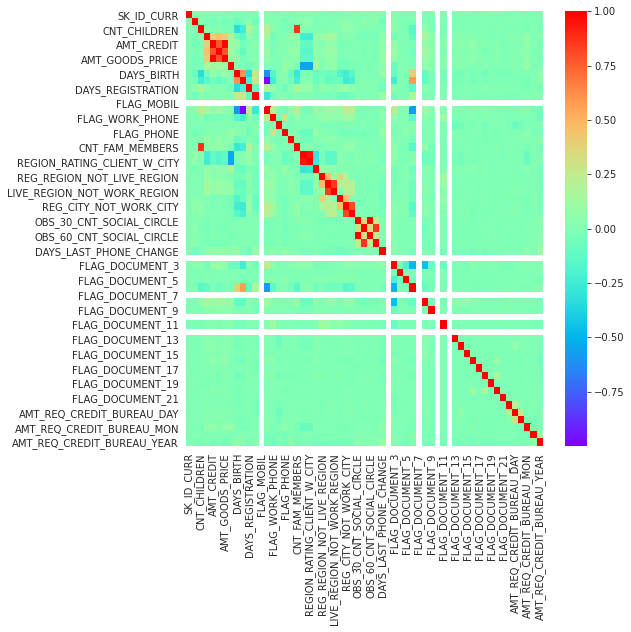

In [ ]:
corrmat = application_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()